In [2]:
import librosa
import librosa.display
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from tqdm import tqdm

from utils import *

path = './summer_2022_project/'
audio_path = path + 'audio/'

df = pd.read_csv(path+'development.csv', dtype={'filename':'string', 'emotion':'string'}) # set string as type
eval_df = pd.read_csv(path+'evaluation.csv', dtype={'filename':'string'}) # set string as type

labels = df.emotion.unique()
labels_dict = {v:k for k,v in enumerate(labels)} #needed to transform categorical labels

df['encoded_emotion'] = df['emotion'].map(labels_dict)
df.head()

/Users/lorenzo/opt/anaconda3/envs/data_science/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,emotion,filename,encoded_emotion
0,Disgusted,0.wav,0
1,Fearful,1.wav,1
2,Neutral,2.wav,2
3,Happy,3.wav,3
4,Angry,4.wav,4


In [28]:
filenames = list(df.filename)
audio_file = audio_path+filenames[0]
signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast')

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/2259906277.py:2: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr)


Text(0.5, 1.0, 'Waveform')

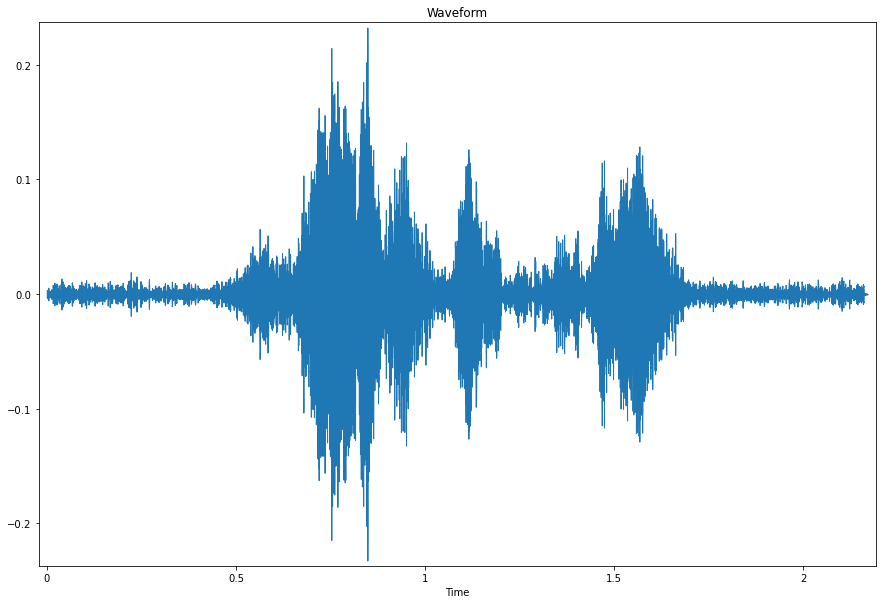

In [39]:
plt.figure(figsize=(15,10))
librosa.display.waveshow(signal, sr)
plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
plt.title('Waveform')

In [5]:
librosa.lpc(signal, order=10)[1:] # position 0 always 1

array([-2.5009222 ,  3.459584  , -3.7570918 ,  3.6285253 , -3.1208367 ,
        2.3862736 , -1.454822  ,  0.74261373, -0.4207478 ,  0.20732896],
      dtype=float32)

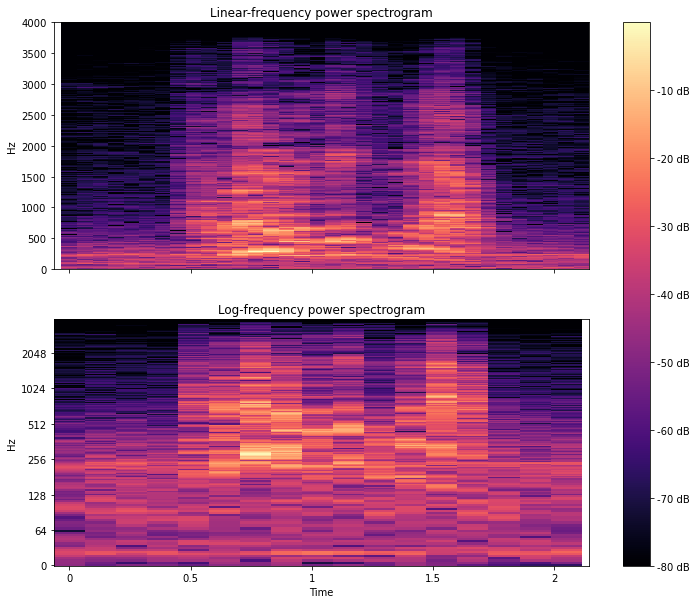

In [6]:
hop_length = 1024
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [7]:
librosa.stft(signal).shape

(1025, 34)

In [8]:
signal.shape

(17352,)

(array([9.28135718e-05, 6.08942171e-05, 9.87795360e-06, ...,
        1.32388974e-07, 1.41151995e-07, 9.00670785e-10]),
 array([0.00000000e+00, 1.15260489e-04, 2.30520977e-04, ...,
        9.99769479e-01, 9.99884740e-01, 1.00000000e+00]),
 <matplotlib.lines.Line2D at 0x1a36f2cb0>)

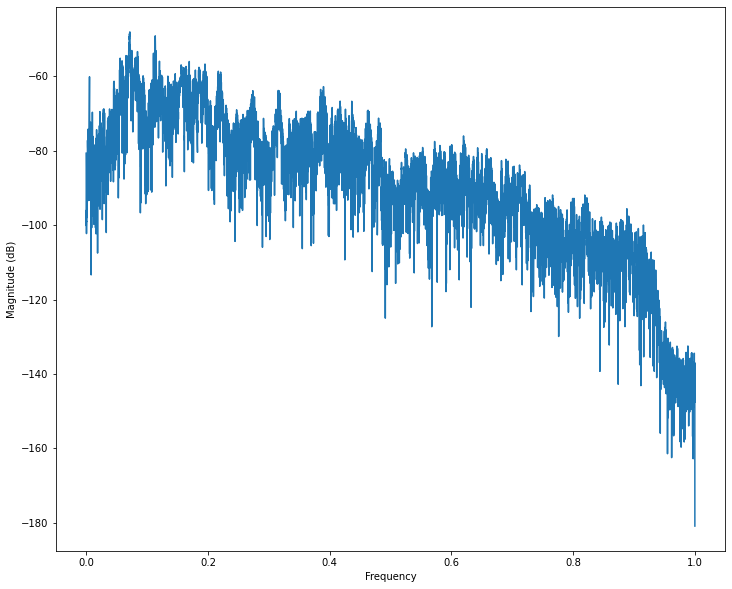

In [25]:
plt.figure(figsize=(12,10))
plt.magnitude_spectrum(signal, scale='dB')

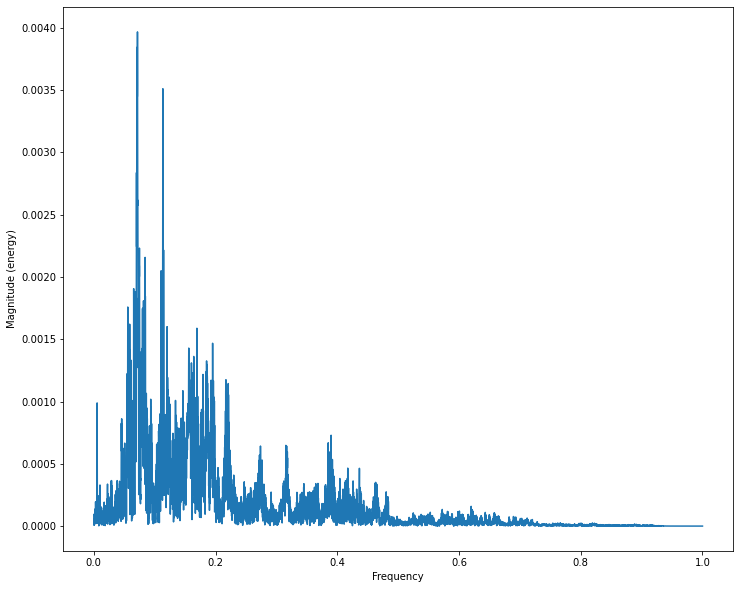

In [27]:
plt.figure(figsize=(12,10))
plt.magnitude_spectrum(signal, scale='linear')
plt.show()

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:13: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:17: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])


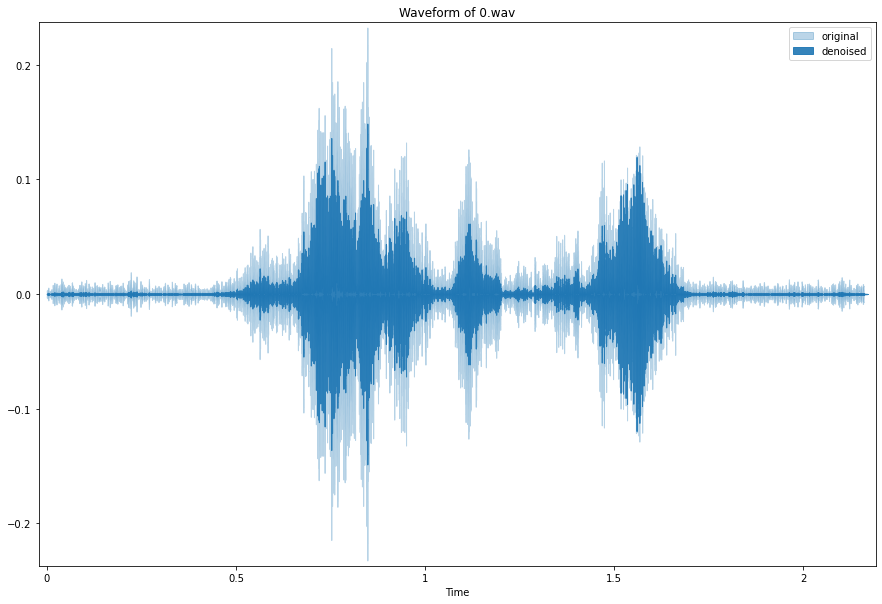

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:13: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:17: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])


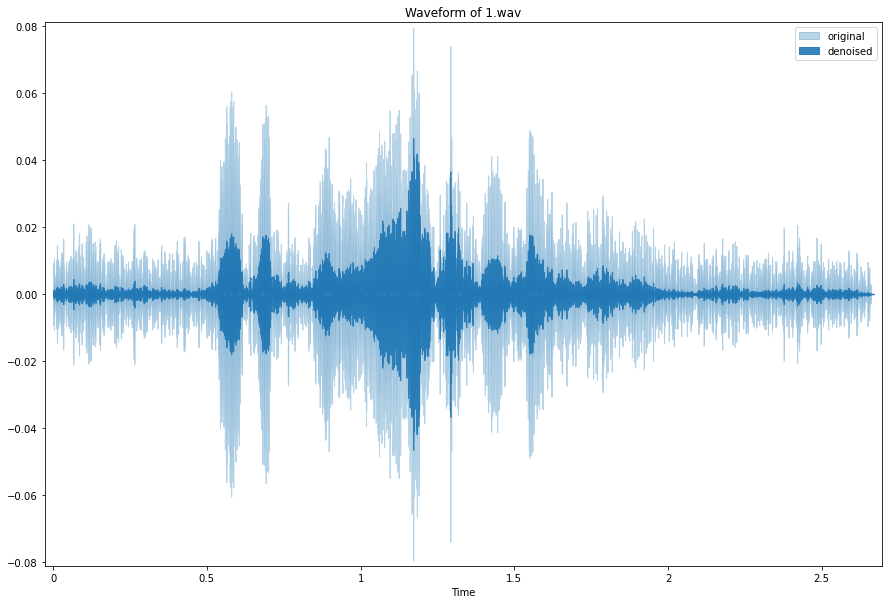

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:13: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:17: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])


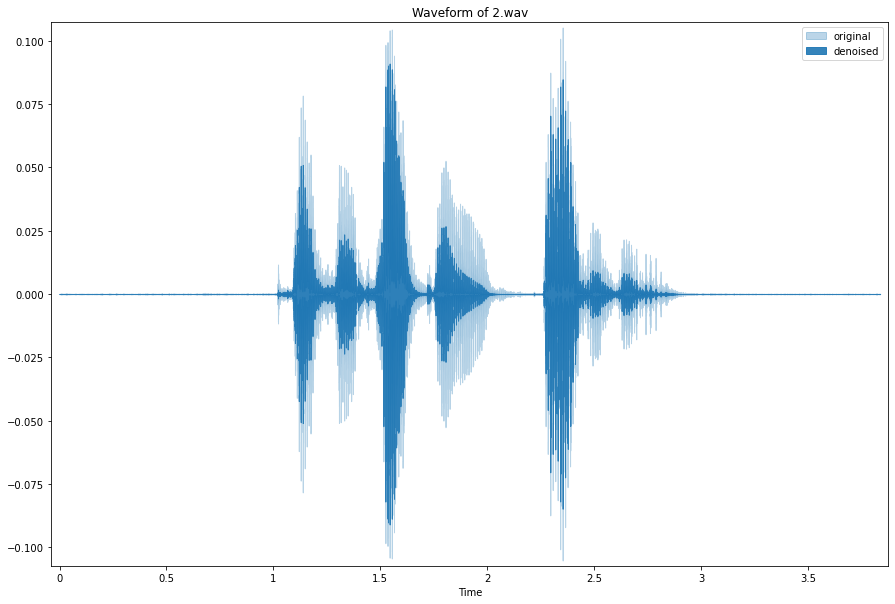

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:13: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:17: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])


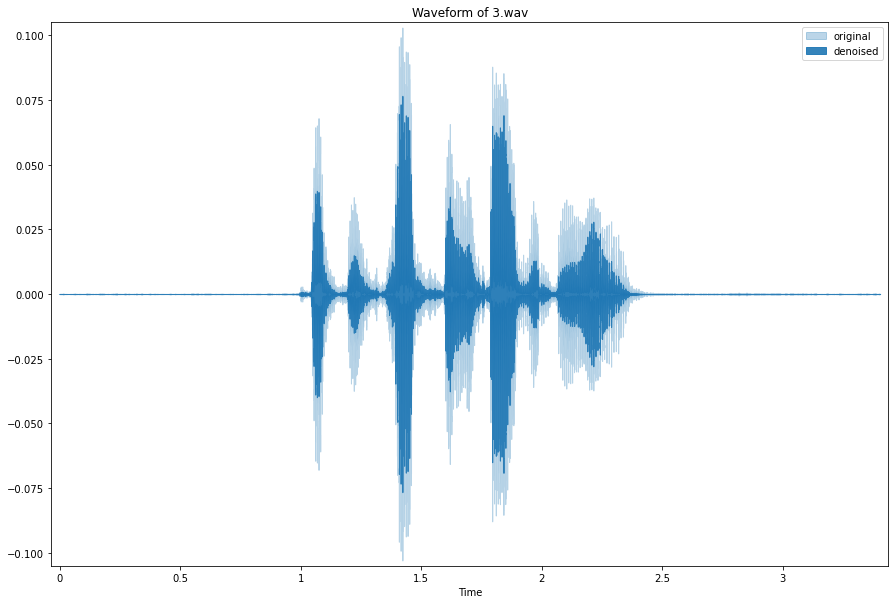

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:13: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/4201244487.py:17: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])


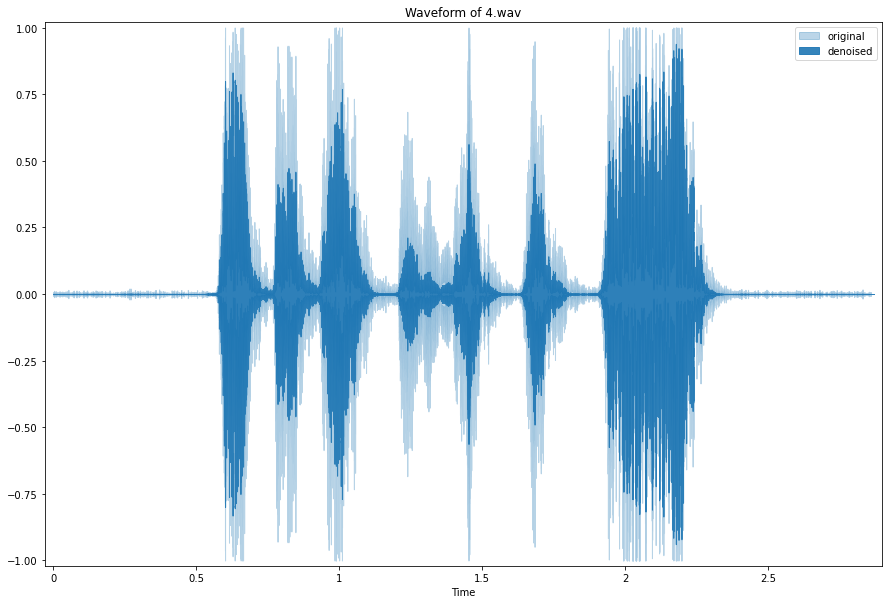

In [87]:
import noisereduce as nr

filenames = list(df.filename)
max_range = 5
#fig, ax = plt.subplots(nrows=max_range, ncols=1, sharex=False)
for i in range(max_range):
    #plt.subplot(max_range, 1, i+1)
    audio_file = audio_path+filenames[i]
    signal, sr = librosa.load(audio_file, sr=None, res_type='kaiser_fast')
    #print(librosa.feature.spectral_centroid(signal, sr)[0].shape)
    plt.figure(figsize=(15,10))
    plt.title(f'Waveform of {filenames[i]}')
    librosa.display.waveshow(signal, sr, label='original', alpha=.3)#, ax=ax[i])
    plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
    
    reduced_signal = nr.reduce_noise(signal, sr)
    librosa.display.waveshow(reduced_signal, sr, label='denoised', alpha=.9, color='tab:blue')#, ax=ax[i])
    plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
    plt.legend()
    plt.show()

In [56]:
signal, sr = librosa.load(audio_file)
librosa.feature.chroma_stft(y=signal, sr=sr).shape

((12, 124), 30.8974609375)

In [52]:
# use values suggested by librosa documentations
f0, voiced_flag, voiced_prob = librosa.pyin(signal, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f0.shape # dimension = number of frames

(124,)

In [58]:
voiced_flag.shape

(124,)

In [59]:
voiced_prob

array([0.01      , 0.01007375, 0.01000282, 0.01      , 0.01      ,
       0.01000282, 0.01      , 0.01      , 0.01000013, 0.01000001,
       0.01      , 0.01      , 0.01005297, 0.01002672, 0.01000001,
       0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01000618, 0.01000419,
       0.01      , 0.01062261, 0.01000003, 0.01000618, 0.03010686,
       0.2065068 , 0.12793709, 0.01646759, 0.01142233, 0.42606233,
       0.3721359 , 0.1504646 , 0.17653061, 0.09203757, 0.01646759,
       0.01082446, 0.0560714 , 0.12793709, 0.01398021, 0.01310026,
       0.01398021, 0.01508559, 0.02294422, 0.01240312, 0.04069733,
       0.04069733, 0.07797524, 0.01      , 0.68608281, 0.54852505,
       0.2065068 , 0.03489743, 0.48498681, 0.68608281, 0.82666856,
       0.82666856, 0.02294422, 0.06608151, 0.17653061, 0.17653061,
       0.07797524, 0.01142233, 0.01818738, 0.02031763, 0.04069733,
       0.01646759, 0.0560714 , 0.2065068 , 0.3721359 , 0.24075

In [60]:
f0[voiced_flag] # return frames with fundamental frequencies

array([248.37216906, 258.62053938, 260.11871293, 261.6255653 ,
       261.6255653 , 261.6255653 , 285.30470202, 280.40333801,
       286.95745535, 290.29174037, 290.29174037, 286.95745535,
       282.02769802, 239.91170119, 239.91170119, 234.43211036,
       233.08188076, 237.15608027, 238.52991147, 234.43211036,
       238.52991147, 239.91170119, 238.52991147, 237.15608027,
       252.7136381 , 272.42079928, 269.29177953, 266.19869963,
       260.11871293, 238.52991147, 230.40470702, 221.27444703,
       220.        , 255.65002913, 255.65002913, 251.25811465,
       249.8109744 , 248.37216906, 244.10528385, 237.15608027,
       241.30149553, 239.91170119, 239.91170119, 291.97338331,
       244.10528385, 241.30149553, 239.91170119, 237.15608027,
       216.22053168, 237.15608027, 235.79016176, 233.08188076,
       235.79016176, 229.07767356,  86.80420621,  87.30705786,
        86.80420621,  85.80717486])

In [62]:
np.mean(f0[voiced_flag]), np.std(f0[voiced_flag])

(238.76159826181438, 45.39801316849212)

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/116465690.py:11: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_signal, sr)
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/116465690.py:11: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_signal, sr)
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/116465690.py:11: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_signal, sr)
/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_931/116465690.py:11: FutureWarning: Pass sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_sign

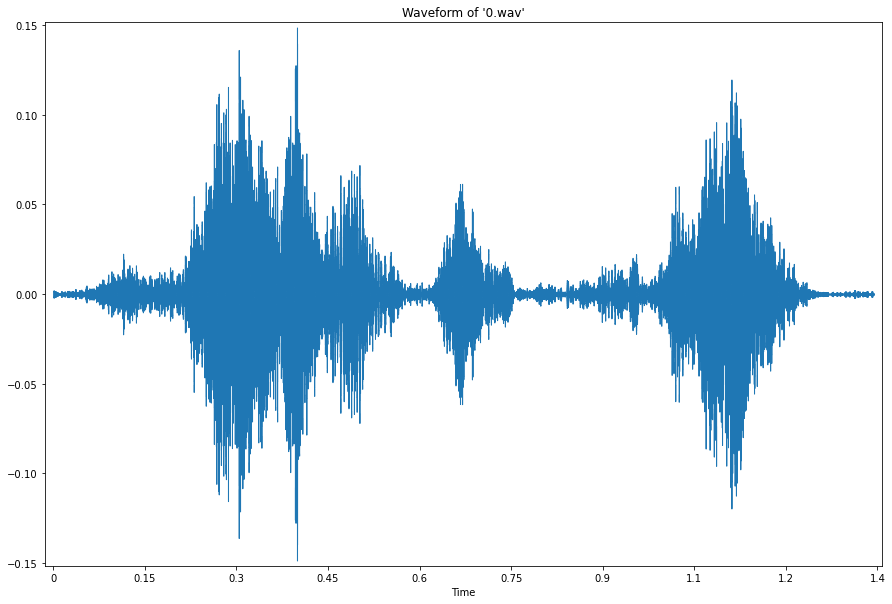

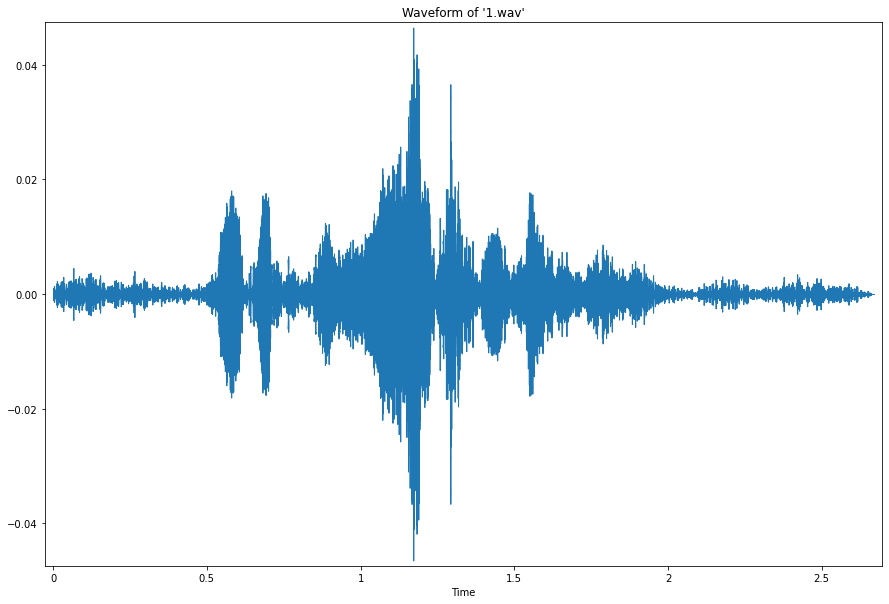

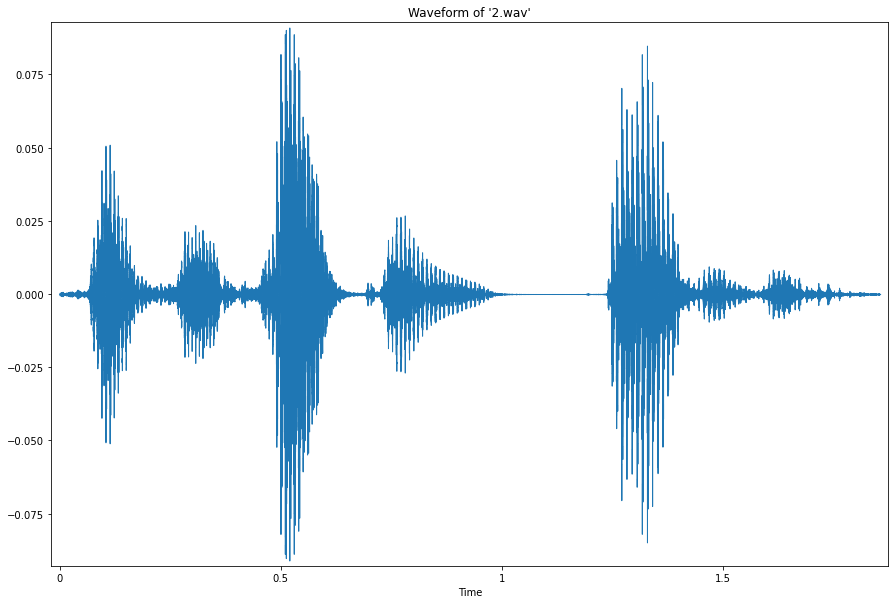

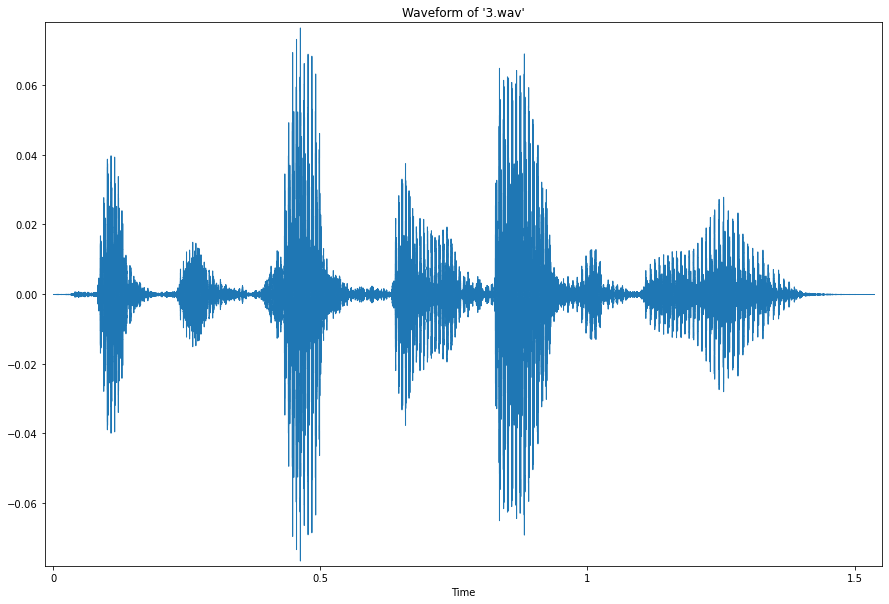

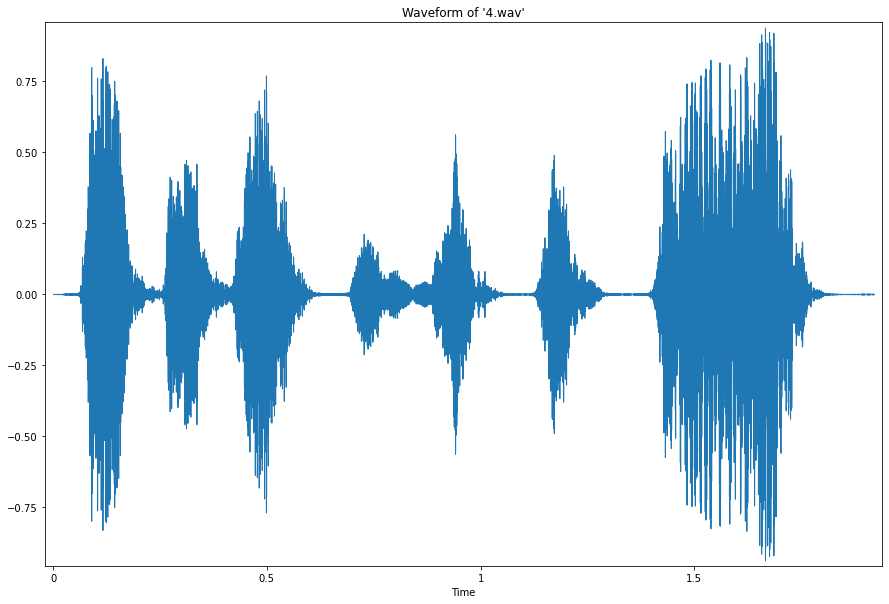

In [88]:

filenames = list(df.filename)
max_range = 5
for i in range(max_range):
    file_name = filenames[i]
    signal, sr = librosa.load(audio_path+file_name, sr=None, res_type='kaiser_fast', mono=True)
    reduced_signal = nr.reduce_noise(signal, sr)
    # trim using librosa and default dB threshold
    trimmed_signal, index = librosa.effects.trim(reduced_signal, top_db=30)

    plt.figure(figsize=(15,10))
    librosa.display.waveshow(trimmed_signal, sr)
    plt.margins(x=0.01, y=0.01) # set to 1% to margin parameters
    plt.title(f"Waveform of '{file_name}'")
    
    wavfile.write(f"{i}_trimmed.wav", sr, trimmed_signal)